### Section 1: Business Understanding
Tariffs being the main subject of any economic discussion since th begining of the year, let's look at the impact it has had on the U.S. econmy from 2000 to 2024. Also determine the potencial impact of tariffs will have on the economy going forward.

### Question 1: Do tariffs affect direstly GDP per capita growth?

### Question 2: What is the impact of tariffs on the labor market?

### Question 3: What is the relation between Inflation and GDP per capita growth?

### 1.Lets import the necessary Library for the Project

In [1]:
#Let's Import the Necessary Library
import pandas as pd   #Library for Data manipulation and Analysis
import numpy as np    #Library for Data manipulation
import matplotlib.pyplot as plt #Library for Data visualization
import seaborn as sns  #Library for data visualization
# Libraries to get different metric scores 
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [2]:
#Lets install Sklearn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn import metrics #Library for Models score
from sklearn.tree import DecisionTreeClassifier #Library for Decision tree model
from sklearn.linear_model  import LinearRegression #Library for Linear regression model

In [4]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix) #Library for model scoring

### Section 2: Data Understanding

In [5]:
#Lets Load the data
data = pd.read_csv('US_Economy.csv') #path to data

In [6]:
data.head() #Looking at the data

,Country Name,Country Code,Time,Time Code,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]
0,United States,USA,2000.0,YR2000,3.376857,3.992,2.1,147139887.0,2.925863
1,United States,USA,2001.0,YR2001,2.826171,4.731,2.11,148213470.0,-0.038732
2,United States,USA,2002.0,YR2002,1.586032,5.783,2.16,149241895.0,0.761237
3,United States,USA,2003.0,YR2003,2.270095,5.989,1.96,149992325.0,1.915882
4,United States,USA,2004.0,YR2004,2.677237,5.529,1.79,151218126.0,2.891111


### Section 3: Data Preparation

In [7]:
#function to change the data input for the GDP per Capita
def f(GDP_per_capita_growth_cat):
    if GDP_per_capita_growth_cat < 0:  #Changing the the GDP per capita that below 0 to decline
         return 'decline'
    elif GDP_per_capita_growth_cat > 0: #Changing the the GDP per capita that above 0 to Growth
        return 'Growth'
    else:
        return 'other' #Anything else return other
    

#Applying the function
data['GDP_per_capita_growth_cat'] = data['GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]'].apply(f)

In [8]:
#Changing GDP_per_capita_growth_cat column data type
#This will help with our analysis as the category data type helps with decision tree and XGB model
data['GDP_per_capita_growth_cat'] = data['GDP_per_capita_growth_cat'].astype('category')

In [9]:
#Lets Look at the Data
data.head()

,Country Name,Country Code,Time,Time Code,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP_per_capita_growth_cat
0,United States,USA,2000.0,YR2000,3.376857,3.992,2.1,147139887.0,2.925863,Growth
1,United States,USA,2001.0,YR2001,2.826171,4.731,2.11,148213470.0,-0.038732,decline
2,United States,USA,2002.0,YR2002,1.586032,5.783,2.16,149241895.0,0.761237,Growth
3,United States,USA,2003.0,YR2003,2.270095,5.989,1.96,149992325.0,1.915882,Growth
4,United States,USA,2004.0,YR2004,2.677237,5.529,1.79,151218126.0,2.891111,Growth


In [10]:
#Lets set our target value to be the GDP per Capita column.
#As we will do analysis to determine the impact of Tarrifs on the GDP per Capita Growth
data['target'] = data['GDP_per_capita_growth_cat']

In [11]:
#Lets Drop the missing values as they will not be suitable for our model prediction
#missing values would not be helpful with our analysis
data.dropna()

,Country Name,Country Code,Time,Time Code,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],GDP_per_capita_growth_cat,target
0,United States,USA,2000.0,YR2000,3.376857,3.992,2.1,147139887.0,2.925863,Growth,Growth
1,United States,USA,2001.0,YR2001,2.826171,4.731,2.11,148213470.0,-0.038732,decline,decline
2,United States,USA,2002.0,YR2002,1.586032,5.783,2.16,149241895.0,0.761237,Growth,Growth
3,United States,USA,2003.0,YR2003,2.270095,5.989,1.96,149992325.0,1.915882,Growth,Growth
4,United States,USA,2004.0,YR2004,2.677237,5.529,1.79,151218126.0,2.891111,Growth,Growth
5,United States,USA,2005.0,YR2005,3.392747,5.084,1.75,153120588.0,2.534111,Growth,Growth
6,United States,USA,2006.0,YR2006,3.225944,4.623,1.7,155267046.0,1.798199,Growth,Growth
7,United States,USA,2007.0,YR2007,2.852672,4.622,1.55,156588966.0,1.038344,Growth,Growth
8,United States,USA,2008.0,YR2008,3.839100,5.784,1.58,158272885.0,-0.828888,decline,decline
9,United States,USA,2009.0,YR2009,-0.355546,9.254,1.71,158353162.0,-3.426832,decline,decline


In [12]:
#The Tariffs column has some missing values. To correct this we will replace them with the mean.


In [13]:
#Thru the next lines of codes we will make sure to retain our non null values in columns
data = data[data['target'].notna()]
data = data[data['Labor force, total [SL.TLF.TOTL.IN]'].notna()]
data = data[data['Time'].notna()]
data = data[data['Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]'].notna()]
data = data[data['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'].notna()]

In [14]:
#Lets drop the columns that are not needed for our analysis
data = data.drop('Country Name', axis=1)
data = data.drop('Country Code', axis=1)
data = data.drop('Time Code', axis=1)

In [15]:
#Lets get info about the columns data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                                Non-Null Count  Dtype   
---  ------                                                                                --------------  -----   
 0   Time                                                                                  25 non-null     float64 
 1   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                25 non-null     float64 
 2   Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]  25 non-null     float64 
 3   Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]          25 non-null     object  
 4   Labor force, total [SL.TLF.TOTL.IN]                                                   25 non-null     float64 
 5   GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]                             

In [16]:
#With The Tarrifs column having data type object with numeric values lets turn this column into Float
data['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'] = pd.to_numeric(data['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'], errors='coerce')

In [17]:
#Lets get info about the columns data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                                Non-Null Count  Dtype   
---  ------                                                                                --------------  -----   
 0   Time                                                                                  25 non-null     float64 
 1   Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                                25 non-null     float64 
 2   Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]  25 non-null     float64 
 3   Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]          23 non-null     float64 
 4   Labor force, total [SL.TLF.TOTL.IN]                                                   25 non-null     float64 
 5   GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]                             

In [18]:
#With our target value being the GP Per Capita growth column, lets drop that column to not create a duplication
data = data.drop('GDP_per_capita_growth_cat', axis=1)

In [19]:
#Lets look at the data again
data.head()

,Time,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]","Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]","Labor force, total [SL.TLF.TOTL.IN]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],target
0,2000.0,3.376857,3.992,2.10,147139887.0,2.925863,Growth
1,2001.0,2.826171,4.731,2.11,148213470.0,-0.038732,decline
2,2002.0,1.586032,5.783,2.16,149241895.0,0.761237,Growth
3,2003.0,2.270095,5.989,1.96,149992325.0,1.915882,Growth
4,2004.0,2.677237,5.529,1.79,151218126.0,2.891111,Growth


In [20]:
#lets look at the Data shape
data.shape

(25, 7)

### Let's rename the Columns

In [21]:
data.rename(columns={'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]': 'Inflation_rate', 'Unemployment, total (% of total labor force) (national estimate) [SL.UEM.TOTL.NE.ZS]': 'Unemployment_rate', 'Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]': 'Tariffs', 'Labor force, total [SL.TLF.TOTL.IN]': 'Labor_force', 'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]': 'GDP_per_capita Groth_rate'}, inplace=True)

In [22]:
#Lets do our data calculation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,25.0,2.012000e+03,7.359801e+00,2.000000e+03,2.006000e+03,2.012000e+03,2.018000e+03,2.024000e+03
Inflation_rate,25.0,2.576392e+00,1.627764e+00,-3.555463e-01,1.622223e+00,2.442583e+00,3.225944e+00,8.002800e+00
Unemployment_rate,25.0,5.694720e+00,1.836783e+00,3.638000e+00,4.355000e+00,5.280000e+00,6.168000e+00,9.633000e+00
Tariffs,23.0,2.244348e+00,2.521869e+00,1.470000e+00,1.620000e+00,1.670000e+00,1.770000e+00,1.378000e+01
Labor_force,25.0,1.600806e+08,7.653333e+06,1.471399e+08,1.552670e+08,1.596828e+08,1.665651e+08,1.741736e+08
GDP_per_capita Groth_rate,25.0,1.404104e+00,1.787295e+00,-3.426832e+00,1.022666e+00,1.797350e+00,2.056766e+00,5.888341e+00


In [23]:
#Lets replace the missing values with the mean for data processing. This will help preserve th data size,
#it wont change the data mean.
data.fillna(data.mean())
data['Tariffs'].fillna((data['Tariffs'].mean()), inplace=True)

In [24]:
#Lets remove any remaining nulls form the data
data.dropna

<bound method DataFrame.dropna of       Time  Inflation_rate  Unemployment_rate    Tariffs  Labor_force  \
0   2000.0        3.376857              3.992   2.100000  147139887.0   
1   2001.0        2.826171              4.731   2.110000  148213470.0   
2   2002.0        1.586032              5.783   2.160000  149241895.0   
3   2003.0        2.270095              5.989   1.960000  149992325.0   
4   2004.0        2.677237              5.529   1.790000  151218126.0   
5   2005.0        3.392747              5.084   1.750000  153120588.0   
6   2006.0        3.225944              4.623   1.700000  155267046.0   
7   2007.0        2.852672              4.622   1.550000  156588966.0   
8   2008.0        3.839100              5.784   1.580000  158272885.0   
9   2009.0       -0.355546              9.254   1.710000  158353162.0   
10  2010.0        1.640043              9.633   1.660000  158330168.0   
11  2011.0        3.156842              8.949   1.670000  158537150.0   
12  2012.0       

### Section 4: Data Visualization

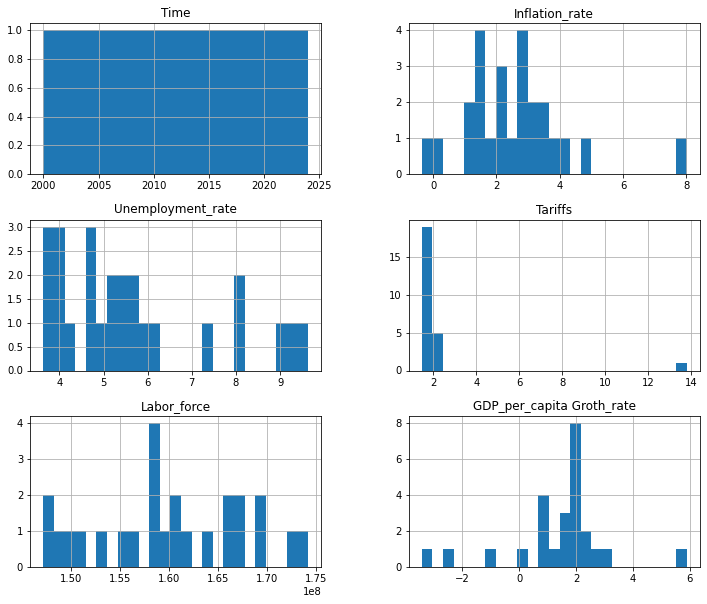

In [25]:
#lets Visualize the data
data.hist(bins=25, figsize=(12, 10))
plt.show()

In [26]:
#lets look at the correlation between the features
corr = data.corr()

In [27]:
corr.style.background_gradient(cmap='coolwarm')

,Time,Inflation_rate,Unemployment_rate,Tariffs,Labor_force,GDP_per_capita Groth_rate
Time,1.000000,0.186214,-0.179487,0.174261,0.987738,0.130067
Inflation_rate,0.186214,1.000000,-0.463121,-0.102408,0.182534,0.423812
Unemployment_rate,-0.179487,-0.463121,1.000000,-0.256676,-0.211319,-0.470682
Tariffs,0.174261,-0.102408,-0.256676,1.000000,0.219141,0.079421
Labor_force,0.987738,0.182534,-0.211319,0.219141,1.000000,0.088024
GDP_per_capita Groth_rate,0.130067,0.423812,-0.470682,0.079421,0.088024,1.000000


### Question 1: Do tariffs affect direstly GDP per capita growth?
#### Answer
Tarrifs display a negative correlation with inflation and unemployment rate. 
We can understand that these metrics are inversely impacted by the rise and lowering of Tariffs on imported goods
The relation of Tariffs and GDP per Capita growth could be indirectly related as the effect of tariffs on 
metric such as Inflation rate and Unemployment rate could impact the GDP per capita growth tremendously

### Question 2: What is the impact of tariffs on the labor market?

#### Answer: 
Tariffs does not seem to have a significantly direct high impact on Labor force market. Although, looking at its impact on the unemployment rate we could depict that tariffs could derive a negative impact on the labor force market. 

### Question 3: What is the relation between Inflation and GDP per capita growth?

#### Answer:

Inflation rate has a relatively considerable relation to GDP per capita. As this impact could not be as impactful in number (0.42 Correlation), it could have a decision impact on it, because it influences the consumption rate which will have an impactful stain on the economy.

### Section 5: Modeling & Evaluation

In [28]:
# Split the data into features and labels
X = data.drop("target", axis=1)
y = data["target"]

In [29]:
#Lets drop the Time column as it will not be necessary
X = X.drop('Time', axis=1)

In [30]:
X.head()  #Lets look at the X data

,Inflation_rate,Unemployment_rate,Tariffs,Labor_force,GDP_per_capita Groth_rate
0,3.376857,3.992,2.10,147139887.0,2.925863
1,2.826171,4.731,2.11,148213470.0,-0.038732
2,1.586032,5.783,2.16,149241895.0,0.761237
3,2.270095,5.989,1.96,149992325.0,1.915882
4,2.677237,5.529,1.79,151218126.0,2.891111


In [31]:
#Lets drop Labor_force Column to reduce noise
X = X.drop('Labor_force', axis= 1)

In [32]:
y.head()  #Lets look at the y data

0     Growth
1    decline
2     Growth
3     Growth
4     Growth
Name: target, dtype: category
Categories (3, object): ['Growth', 'decline', 'other']

In [33]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
print(X.values.shape, X_test.shape)

(25, 4) (7, 4)


In [34]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=13, min_samples_leaf= 8)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=13)

[Text(0.5, 0.75, 'X[0] <= 2.1\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

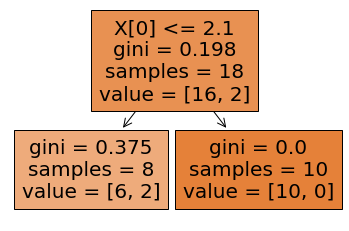

In [35]:
# plot the decision tree
from sklearn.tree import plot_tree
plot_tree(model, filled=True)

In [36]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [37]:
# calculate accuracy on training and test set
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_pred_train, y_train)
acc_test = accuracy_score(y_pred_test, y_test)
print(acc_train)
print(acc_test)

0.8888888888888888
0.7142857142857143


### With the score on the trainning set being slightly higher than the score on the test set. Lets keep exploring 

In [38]:
#Lets look at the Recall Score
score = f1_score(y_test, y_pred_test, average='macro')

print("Score is = {}".format(score))

Score is = 0.41666666666666663


### The recall score is fairly low, lets try to prune and use other metrics to improve the model

In [39]:
from sklearn.model_selection import KFold, cross_val_score #Lets bring in the cross validation function to improve the score

In [40]:
k_folds = KFold(n_splits = 5) #lets use the Kfolds function defintion and spliting option to prune the model

scores = cross_val_score(model, X, y, cv = k_folds) #Lets look at the score

In [41]:
#lets print the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8 0.6 1.  1.  0.8]
Average CV Score:  0.8400000000000001
Number of CV Scores used in Average:  5


With hyperparameter and cross validation tunning the model still indicates Overfitting
lets find other ways to enhance the model performance

In [42]:
#Lets use Xgboost to improve the model

In [43]:
#lets install Xgboost
%pip install Xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
import xgboost as xgb #lets import the xgboost model library

In [45]:
#lets work on the data by reclassifying GDP per capita where: Growth = 1, and Decline = 0

In [46]:
#Lets use a function to redifine the GDP per capita column to better fit the xgboost model analysis
def f(GDP_per_capita_growth_catXG):
    if GDP_per_capita_growth_catXG == 'decline': #if GPD per capita is decline return 0
         return 0
    elif GDP_per_capita_growth_catXG == 'Growth': #if GPD per capita is Growth return 1
        return 1
    else:
        return 'other'    #if GPD per capita is anything else return other

data['GDP_per_capita_growth_catXG'] = data['target'].apply(f)  #lets apply the function

In [47]:
data.head() #lets observe the change on the data

,Time,Inflation_rate,Unemployment_rate,Tariffs,Labor_force,GDP_per_capita Groth_rate,target,GDP_per_capita_growth_catXG
0,2000.0,3.376857,3.992,2.10,147139887.0,2.925863,Growth,1
1,2001.0,2.826171,4.731,2.11,148213470.0,-0.038732,decline,0
2,2002.0,1.586032,5.783,2.16,149241895.0,0.761237,Growth,1
3,2003.0,2.270095,5.989,1.96,149992325.0,1.915882,Growth,1
4,2004.0,2.677237,5.529,1.79,151218126.0,2.891111,Growth,1


In [48]:
#lets change the column data type to categorical data
#This will help with our analysis as the category data type helps with decision tree and XGB model
data['GDP_per_capita_growth_catXG'] = data['GDP_per_capita_growth_catXG'].astype('category')

In [49]:
#lets look at the data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Time                         25 non-null     float64 
 1   Inflation_rate               25 non-null     float64 
 2   Unemployment_rate            25 non-null     float64 
 3   Tariffs                      25 non-null     float64 
 4   Labor_force                  25 non-null     float64 
 5   GDP_per_capita Groth_rate    25 non-null     float64 
 6   target                       25 non-null     category
 7   GDP_per_capita_growth_catXG  25 non-null     category
dtypes: category(2), float64(6)
memory usage: 1.7 KB


In [50]:
# Split into X and y, drop the target variable from X and convert y to binary
y1 = data['target'].map({'decline': 0, 'Growth': 1})
X1 = data.drop('target', axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=13)

# Initialize XGBoost classifier
model1 = xgb.XGBClassifier(enable_categorical=True, tree_method='hist')

# Fit the model
model1.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
#Lets look at the score on the training set
model1.score(X1_train, y1_train)

0.8888888888888888

In [52]:
#lets look at the score on the test set
model1.score(X1_test, y1_test)

0.7142857142857143

In [53]:
from xgboost import XGBClassifier #lets import the XGBclassifir

### Observation: 
After continuous tuning of the model the score of the model is still the same therefore this is the best this model can perform.

In [54]:
#lets tune the xgb model to improve
model2 = xgb.XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.1,
    gamma=5,
    enable_categorical=True,
    tree_method='hist'
)## code with the best parameters obtained from tuning

model2.fit(X1_train, y1_train) ##code to fit the model on over sampled data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

In [55]:
#lets look at the score on training
model2.score(X1_train, y1_train)

0.8888888888888888

In [56]:
#lets look at the test
model2.score(X1_test, y1_test)

0.7142857142857143

In [57]:
#Let's get prediction
y1_pred = model2.predict(X1)

In [58]:
#Lets look at the Score
score = f1_score(y1, y1_pred, average='macro')

print("Score is = {}".format(score))

Score is = 0.4565217391304348


### Observation

After conducting multiple pruning, 71% is the best our models can do on the test data. 
There has been a slightly improvement on the recall score.

### 6. Conclusion

The model continuously sugests overfitting after hyperparameter tuning and some future engineering. Perhaps more sampling of the data could help the model to perform better.